In [10]:
import os
import numpy as np 
from PIL import Image 
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model


In [11]:
#a refrence to all the floders including root
rootdir="Desktop/statefarm1/train/"

In [12]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [13]:
foldrs =(len(os.listdir(rootdir)))
print(str(foldrs) + " folders with the data \n")

f0= len(os.listdir("Desktop/statefarm1/train/c0/"))
f1= len(os.listdir("Desktop/statefarm1/train/c1/"))
f2= len(os.listdir("Desktop/statefarm1/train/c2/"))
f3= len(os.listdir("Desktop/statefarm1/train/c3"))
f4= len(os.listdir("Desktop/statefarm1/train/c4/"))
f5= len(os.listdir("Desktop/statefarm1/train/c5/"))
f6= len(os.listdir("Desktop/statefarm1/train/c6/"))
f7= len(os.listdir("Desktop/statefarm1/train/c7/"))
f8= len(os.listdir("Desktop/statefarm1/train/c8/"))
f9= len(os.listdir("Desktop/statefarm1/train/c9/"))

print("the first folder contains "+ str(f0) +" pictures")
print("the second folder contains "+ str(f1) +" pictures")
print("the third folder contains "+ str(f2) +" pictures")
print("the fourth folder contains "+ str(f3) +" pictures")
print("the fifth folder contains "+ str(f4) +" pictures")
print("the sixth folder contains "+ str(f5) +" pictures")
print("the seventh folder contains "+ str(f6) +" pictures")
print("the eight folder contains "+ str(f7) +" pictures")
print("the nineth folder contains "+ str(f8) +" pictures")
print("the tenthfolder contains "+ str(f9) +" pictures")

10 folders with the data 

the first folder contains 2489 pictures
the second folder contains 2267 pictures
the third folder contains 2317 pictures
the fourth folder contains 2346 pictures
the fifth folder contains 2326 pictures
the sixth folder contains 2312 pictures
the seventh folder contains 2325 pictures
the eight folder contains 2002 pictures
the nineth folder contains 1911 pictures
the tenthfolder contains 2129 pictures


In [14]:



def create_new_dir():
    
    if not os.path.exists('Desktop/trainstate'):
        os.mkdir('Desktop/trainstate')
        
create_new_dir()

import os
import shutil

src = 'Desktop/statefarm1/train/'
dest = 'Desktop/trainstate'

for path, subdirs, files in os.walk(src):
    for name in files:
        filename = os.path.join(path, name)
        shutil.copy(filename, dest)
#in pictures folder sort by date and decending!!!!!!!!!!!

In [15]:
train_dir = 'Desktop/trainstate/'

In [16]:
size=150
chan = 3
num_pics = len(os.listdir(train_dir))


In [17]:
num_pics

22424

In [18]:
for i, im in enumerate(os.listdir(train_dir)):
    
    data= np.ndarray([num_pics, size, size ,chan])
    img = Image.open(train_dir+ im)
    im_resize= img.resize((size,size),Image.ANTIALIAS)
    im_array= np.array(im_resize)
    im_normal = im_array-(255.0/2)/255.0
    data[i,:,:,:]= im_normal.reshape(-1,size,size,chan)
    X_train= data

In [19]:
l=len(X_train)
print("there are " + str(l) + " preproccesd pictures")

there are 22424 preproccesd pictures


In [20]:
la= []
for pic in enumerate(os.listdir("Desktop/statefarm1/train/c0/")):
    la.append(9)
for pic in enumerate( os.listdir("Desktop/statefarm1/train/c1/")):
    la.append(8)
for pic in enumerate( os.listdir("Desktop/statefarm1/train/c2/")):
    la.append(7)
for pic in enumerate(os.listdir("Desktop/statefarm1/train/c3/")):
    la.append(6)
for pic in enumerate(os.listdir("Desktop/statefarm1/train/c4/")):
    la.append(5)
for pic in enumerate(os.listdir("Desktop/statefarm1/train/c5/")):
    la.append(4)
for pic in enumerate(os.listdir("Desktop/statefarm1/train/c6/")):
    la.append(3)
for pic in enumerate (os.listdir("Desktop/statefarm1/train/c7/")):
    la.append(2)
for pic in enumerate(os.listdir("Desktop/statefarm1/train/c8/")):
    la.append(1)
for pic in enumerate(os.listdir("Desktop/statefarm1/train/c9/")):
    la.append(0)


In [21]:
len(la)

22424

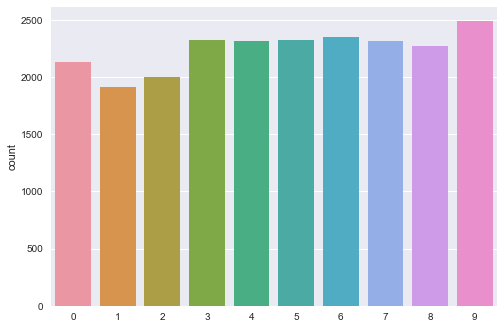

In [22]:
sns.countplot(la)
plt.show()


In [23]:

chan =3
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(size,size,chan), activation='relu'))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,..., activation="relu", padding="same")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu

In [24]:
nb_epoch = 2
batch_size = 16
model.fit(X_train, la, batch_size=batch_size, nb_epoch=nb_epoch, validation_split=0.25, verbose=1)

C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 16818 samples, validate on 5606 samples
Epoch 1/2
16818/16818 [==============================] - 2632s - loss: 0.4059 - acc: 0.0000e+00 - val_loss: 0.6523 - val_acc: 0.3411
Epoch 2/2
16818/16818 [==============================] - 2663s - loss: -0.1586 - acc: 0.0000e+00 - val_loss: 0.6146 - val_acc: 0.3411


In [26]:
img = cv2.imread('Desktop/drink.png')
img = cv2.resize(img,(size,size))
img = np.reshape(img,[1,size,size,chan])


In [27]:
predictions = model.predict(img, verbose=0)

In [28]:
print(predictions)

[[ 0.38995594]]


In [29]:
#for more accurate results lets try to add some controled noise to our data
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [30]:

train_generator = datagen.flow_from_directory(
        "Desktop/statefarm1/train/",  # this is the target directory
        target_size=(size, size),  # all images will be resized to 150x150
        batch_size=20,
        class_mode='binary')

Found 22424 images belonging to 10 classes.


In [31]:
batch_size = 16
model.fit_generator(
        train_generator,steps_per_epoch=2000 // batch_size,
 nb_epoch=20)
 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=125, epochs=20)`
  after removing the cwd from sys.path.


Epoch 1/20
125/125 [==============================] - 359s - loss: -54.4765 - acc: 0.1008   
Epoch 2/20
125/125 [==============================] - 358s - loss: -53.3367 - acc: 0.0876   
Epoch 3/20
125/125 [==============================] - 364s - loss: -51.7425 - acc: 0.1028   
Epoch 4/20
125/125 [==============================] - 354s - loss: -53.6748 - acc: 0.0940   
Epoch 5/20
125/125 [==============================] - 351s - loss: -52.2262 - acc: 0.1100   
Epoch 6/20
125/125 [==============================] - 345s - loss: -52.9096 - acc: 0.0996   
Epoch 7/20
125/125 [==============================] - 348s - loss: -53.5322 - acc: 0.1020   
Epoch 8/20
125/125 [==============================] - 348s - loss: -51.4616 - acc: 0.1148   
Epoch 9/20
125/125 [==============================] - 355s - loss: -53.8763 - acc: 0.0992   
Epoch 10/20
125/125 [==============================] - 343s - loss: -54.0061 - acc: 0.0988   
Epoch 11/20
125/125 [==============================] - 344s - loss: -

In [32]:
model.save('alex_modelbigg1.h5')

In [33]:
model = load_model('alex_modelbigg1.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
img = cv2.imread('Desktop/drink.png')
img = cv2.resize(img,(size,size))
img = np.reshape(img,[1,size,size,chan])

classes = model.predict(img)